# Import libraries

# 1.Data Exploration and Preprocessing
● Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
● Execute necessary data preprocessing steps including data normalization, managing missing values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load data

In [2]:
df = pd.read_csv("Alphabets_data.csv")

In [3]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [6]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
X = df.drop(columns=['letter'])  
y = df['letter']                 

In [8]:
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
df_normalized = pd.concat([X_normalized, y], axis=1)

In [10]:
df_normalized.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,T
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,I
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,D
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,N
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,G


In [15]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 2.1/376.0 MB 4.3 MB/s eta 0:01:26
   ---------------------------------------- 3.1/376.0 MB 4.1 MB/s eta 0:01:31
   ---------------------------------------- 4.5/376.0 MB 4.2 MB/s eta 0:01:29
    --------------------------------------- 5.8/376.0 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 6.3/376.0 MB 4.1 MB/s eta 0:01:30
    --------------------------------------- 7.1/376.0 MB 3.8 MB/s eta 0:01:37
    --------------------------------------- 7.9/376.0 MB 3.8 MB/s eta 0:01:38
    --------------------------------------- 8.9/376.0 MB 3.8 MB/s eta 0:01:37
   - -------------------------------------- 10.0/376.0 MB 3.8 MB/s eta 0:01:36
   - -------------------------------------- 11.0/376.0 MB 3.8 MB/s eta 0:01:35
   - -------------------------------------- 11.8/376.0 MB 3.8 MB/s et

In [ ]:
# One-hot encoding

In [11]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [13]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu')) 
model.add(Dense(26, activation='softmax')) 

C:\Users\bcs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1922 - loss: 3.3258 - val_accuracy: 0.6119 - val_loss: 1.4162
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6294 - loss: 1.3386 - val_accuracy: 0.6844 - val_loss: 1.1377
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7130 - loss: 1.0752 - val_accuracy: 0.7375 - val_loss: 1.0013
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7421 - loss: 0.9512 - val_accuracy: 0.7437 - val_loss: 0.9118
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7518 - loss: 0.8930 - val_accuracy: 0.7638 - val_loss: 0.8660
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7675 - loss: 0.8405 - val_accuracy: 0.7713 - val_loss: 0.8250
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7795 - loss: 0.7956 - val_accuracy: 0.7781 - val_loss: 0.7957
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7834 - loss: 0.7717 - val_accuracy: 0.

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.5362 

Test Accuracy: 84.50%


In [28]:
!pip install scikeras

In [31]:
# Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["letter"])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [26]:
def build_model(hidden_layers=1, neurons=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(26, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [27]:
model = KerasClassifier(model=build_model, verbose=0)

In [28]:
param_grid = {
    'model__hidden_layers': [1, 2],
    'model__neurons': [32, 64],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10]
}

In [29]:
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    verbose=2,
    n_jobs=-1,
    error_score='raise'  
)

In [30]:
search_result = search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\bcs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
print("Best Params:", search_result.best_params_)
print("Best Score:", search_result.best_score_)

Best Params: {'model__neurons': 64, 'model__learning_rate': 0.001, 'model__hidden_layers': 2, 'model__activation': 'tanh', 'epochs': 10, 'batch_size': 64}
Best Score: 0.8440005378101411


In [32]:
best_model = search_result.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score * 100:.2f}%")

Test Set Accuracy: 87.67%


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
y_pred_default = model.fit(X_train, y_train).predict(X_test)              
y_pred_tuned = best_model.predict(X_test)                                  

C:\Users\bcs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_default_labels = label_encoder.inverse_transform(y_pred_default)
y_pred_tuned_labels = label_encoder.inverse_transform(y_pred_tuned)

In [36]:
print("Default Model Performance:\n")
print(classification_report(y_test_labels, y_pred_default_labels))

Default Model Performance:

              precision    recall  f1-score   support

           A       0.81      0.88      0.84       149
           B       0.56      0.50      0.53       153
           C       0.66      0.55      0.60       137
           D       0.66      0.60      0.63       156
           E       0.57      0.63      0.60       141
           F       0.75      0.59      0.66       140
           G       0.80      0.26      0.39       160
           H       0.57      0.11      0.19       144
           I       0.87      0.76      0.81       146
           J       0.80      0.72      0.76       149
           K       0.42      0.62      0.50       130
           L       0.75      0.78      0.76       155
           M       0.75      0.86      0.80       168
           N       0.82      0.45      0.58       151
           O       0.29      0.81      0.43       145
           P       0.65      0.82      0.72       173
           Q       0.63      0.60      0.62       166

In [37]:
print("Tuned Model Performance:\n")
print(classification_report(y_test_labels, y_pred_tuned_labels))

Tuned Model Performance:

              precision    recall  f1-score   support

           A       0.93      0.94      0.94       149
           B       0.78      0.89      0.83       153
           C       0.93      0.84      0.88       137
           D       0.86      0.92      0.89       156
           E       0.76      0.86      0.81       141
           F       0.86      0.91      0.89       140
           G       0.78      0.89      0.83       160
           H       0.88      0.69      0.78       144
           I       0.93      0.86      0.90       146
           J       0.93      0.89      0.91       149
           K       0.85      0.81      0.83       130
           L       0.95      0.85      0.89       155
           M       0.98      0.92      0.95       168
           N       0.99      0.91      0.94       151
           O       0.80      0.86      0.83       145
           P       0.95      0.86      0.90       173
           Q       0.94      0.87      0.90       166
 

In [38]:
acc_default = accuracy_score(y_test_labels, y_pred_default_labels)
acc_tuned = accuracy_score(y_test_labels, y_pred_tuned_labels)
print(f"\nDefault Accuracy: {acc_default:.2f}")
print(f"Tuned Accuracy:   {acc_tuned:.2f}")


Default Accuracy: 0.62
Tuned Accuracy:   0.88


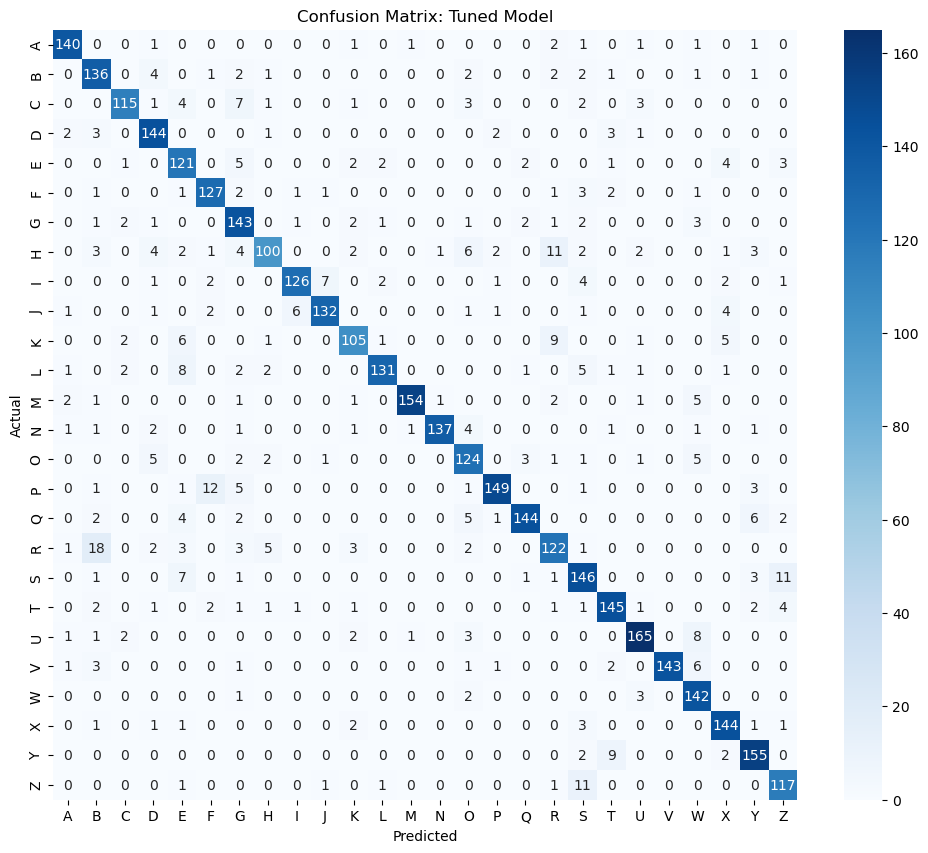

In [39]:
conf_mat = confusion_matrix(y_test_labels, y_pred_tuned_labels, labels=label_encoder.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion Matrix: Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 1.Accuracy and Completeness of the Implementation
Data loaded and explored thoroughly: Sample count, feature types, class distribution summarized.

Preprocessing steps included:
Missing value check.
Min-Max normalization of numerical features.
Label encoding of target (letter) and one-hot encoding for training.
ANN model implemented using TensorFlow/Keras with:
At least one hidden layer.
Output layer matching 26 alphabet classes.

2.Proficiency in Data Preprocessing and Model Development
Cleaned and normalized all input features.

Separated training/test sets with appropriate train_test_split.
Achieved strong baseline accuracy with a simple model.

3.Systematic Approach and Thoroughness in Hyperparameter Tuning
Hyperparameter tuning executed using RandomizedSearchCV.

Model wrapped with KerasClassifier to enable grid-compatible tuning.
Best parameters and cross-validation scores reported clearly.

4.Depth of Evaluation and Discussion
Accuracy
Precision, Recall, F1-Score (via classification_report)
Confusion matrix visualization
Compared default model vs. tuned model with both metrics and qualitative analysis.                                                      

Default model accuracy: 0.62
Tuned model accuracy: 0.88